# **The Battle of the Neighborhoods**

 **Figure out how Similar are San Francisco and Manhattan**

## Table of contents
* [Business Problem](#introduction)
* [Data Requirement and Collection](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Business Problem <a id="introduction"></a>

In this project, we will explore the venues arleady exit in San Francisco and figure out the **similarity** between San Fancisico and Manhattan.To be more specific, how similar venues distributed in their neigborhoods. This report will target to clients who are interested in explore USA top cities' lifestyle.

We will first find the venues already existed in both cities, as well as those **venues categories**. Then we will cluster the neibohoods depend on the **top venues categories** they have. Finnally, we will compare the **neiborhood distributions** and figure out how similar those two cities are.

# Data Requirement and Collection <a id="#data"></a>

Based on definition of our problem, factors that will influence our decission are:
* **Existing venues** in both cities' neighborhoods (in all category)

Following data sources will be needed to extract/generate the required information:
* Use **geocoders.Nominatim package** to get San Francisco geographical coordinates, whihc is used to convert an address into latitude and longitude values
* San Francisco Neighborhoods Zipcode and geograpphical info will be obtained through [http://www.healthysf.org/bdi/outcomes/zipmap.htm]
* In formation of existing Venues will be obtained throuth **Foursquare API**

### Scrape Zipcode and Neighborhood info for San Francisco

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 

Solving environment: / 
  - anaconda::ca-certificates-2019.1.23-0
  - defaults::ca-certificates-2019.1.23done

# All requested packages already installed.



In [97]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [95]:
url = 'http://www.healthysf.org/bdi/outcomes/zipmap.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, "html.parser")

In [126]:
table=soup.find_all('table')[2]
df = pd.read_html(str(table),header=0)[1]
df

,Zip Code,Neighborhood,Population (Census 2000)
0,94102,Hayes Valley/Tenderloin/North of Market,28991
1,94103,South of Market,23016
2,94107,Potrero Hill,17368
3,94108,Chinatown,13716
4,94109,Polk/Russian Hill (Nob Hill),56322
5,94110,Inner Mission/Bernal Heights,74633
6,94112,Ingelside-Excelsior/Crocker-Amazon,73104
7,94114,Castro/Noe Valley,30574
8,94115,Western Addition/Japantown,33115
9,94116,Parkside/Forest Hill,42958


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Zip Code                    22 non-null object
Neighborhood                22 non-null object
Population (Census 2000)    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [128]:
# the last row is a total, remove this row
SF_data=df[:21]

### Get Geographical Coordinates of Neighborhoods

San Francisco Geographical Coordinates

In [129]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


San Francisco Neighborhoods Geographical Coordinates

In [130]:
coordinates=[]
for address in SF_data['Zip Code']:
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    coordinates.append([latitude,longitude])

[[37.7795357994375, -122.418175163352],
 [37.7743912951269, -122.411140626396],
 [37.7933852668154, -122.407971337301],
 [37.7910599290438, -122.406552297468],
 [37.7938033010171, -122.420581513987],
 [37.753346779676, -122.416549171736],
 [37.723791044709, -122.443465604266],
 [37.7613003240069, -122.436787487109],
 [37.7839388657814, -122.435298226648],
 [37.7463705228877, -122.47296205431],
 [37.7669297295875, -122.450781308989],
 [37.7760051, -122.456841129853],
 [37.778586905938, -122.492349197148],
 [37.7598974, -122.4736497],
 [37.7989121982732, -122.429836360005],
 [37.746323419368, -122.396583760019],
 [37.7396165489652, -122.465327579108],
 [37.750576694446, -122.451702345714],
 [37.7175391, -122.4737768],
 [37.7983385542811, -122.409618450522],
 [37.7143841, -122.4113282]]

In [135]:
nh_co=pd.DataFrame(coordinates,index=SF_data.index,columns=['latitude','longitude'])
SF_geodata=pd.concat([SF_data, nh_co], axis=1, sort=False)
SF_geodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
Zip Code                    21 non-null object
Neighborhood                21 non-null object
Population (Census 2000)    21 non-null int64
latitude                    21 non-null float64
longitude                   21 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 920.0+ bytes


In [225]:
SF_geodata

,Zip Code,Neighborhood,Population (Census 2000),latitude,longitude
0,94102,Hayes Valley/Tenderloin/North of Market,28991,37.779536,-122.418175
1,94103,South of Market,23016,37.774391,-122.411141
2,94107,Potrero Hill,17368,37.793385,-122.407971
3,94108,Chinatown,13716,37.791060,-122.406552
4,94109,Polk/Russian Hill (Nob Hill),56322,37.793803,-122.420582
5,94110,Inner Mission/Bernal Heights,74633,37.753347,-122.416549
6,94112,Ingelside-Excelsior/Crocker-Amazon,73104,37.723791,-122.443466
7,94114,Castro/Noe Valley,30574,37.761300,-122.436787
8,94115,Western Addition/Japantown,33115,37.783939,-122.435298
9,94116,Parkside/Forest Hill,42958,37.746371,-122.472962


### Get Venues Info in each Neighborhood

Now we will get **Venues Name**, **Geographical Coordinates**, **Category** by using **Foursquare API**

In [180]:
CLIENT_ID = 'A3OM4LOCPUIT445ZRRDCQY5XAEEWWFI1COTFDV2A4NO111IQ' # your Foursquare ID
CLIENT_SECRET = 'D4BYJCPM2ZL1C1VFJGR1LCY1XP1TY041WSFHY3AWML5KAVNK' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A3OM4LOCPUIT445ZRRDCQY5XAEEWWFI1COTFDV2A4NO111IQ
CLIENT_SECRET:D4BYJCPM2ZL1C1VFJGR1LCY1XP1TY041WSFHY3AWML5KAVNK


In [412]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,LIMIT=30):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        venue=results['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue])

    nearby_venues = pd.DataFrame([item for venuel in venues_list for item in venuel])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [419]:
SF_venues = getNearbyVenues(names=SF_geodata['Neighborhood'],
                                   latitudes=SF_geodata['latitude'],
                                   longitudes=SF_geodata['longitude']
                                  )

In [414]:
print(SF_venues.shape)
SF_venues.head()

(630, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Asian Art Museum,37.780178,-122.416505,Art Museum
1,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
2,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Herbst Theater,37.779548,-122.420953,Concert Hall
3,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Philz Coffee,37.781433,-122.417073,Coffee Shop
4,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,War Memorial Opera House,37.778601,-122.420816,Opera House


### Visualize Venues in all Neighborhoods

In [408]:
id=['56aa371be4b08b9a8d5734db','4fceea171983d5d06c3e9823']
url = 'https://api.foursquare.com/v2/venues/categories?id={}&client_id={}&client_secret={}&v={}'.format(
            id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
        # make the GET request
results = requests.get(url).json()
results['response']['categories']

[{'id': '4d4b7104d754a06370d81259',
  'name': 'Arts & Entertainment',
  'pluralName': 'Arts & Entertainment',
  'shortName': 'Arts & Entertainment',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
   'suffix': '.png'},
  'categories': [{'id': '56aa371be4b08b9a8d5734db',
    'name': 'Amphitheater',
    'pluralName': 'Amphitheaters',
    'shortName': 'Amphitheater',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': []},
   {'id': '4fceea171983d5d06c3e9823',
    'name': 'Aquarium',
    'pluralName': 'Aquariums',
    'shortName': 'Aquarium',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
     'suffix': '.png'},
    'categories': []},
   {'id': '4bf58dd8d48988d1e1931735',
    'name': 'Arcade',
    'pluralName': 'Arcades',
    'shortName': 'Arcade',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_ent

In [415]:
SF_visual=SF_venues
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
SF_visual.iloc[:, -1] = labelencoder_X.fit_transform(SF_visual.iloc[:, -1]) # All rows and first column i.e country column
SF_visual.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Asian Art Museum,37.780178,-122.416505,6
1,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Louise M. Davies Symphony Hall,37.777976,-122.420157,42
2,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Herbst Theater,37.779548,-122.420953,42
3,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,Philz Coffee,37.781433,-122.417073,39
4,Hayes Valley/Tenderloin/North of Market,37.779536,-122.418175,War Memorial Opera House,37.778601,-122.420816,126


In [416]:
# create map
venues_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, name in zip(SF_visual['Venue Latitude'], SF_visual['Venue Longitude'], SF_visual['Neighborhood'], SF_visual['Venue']):
    label = folium.Popup(str(poi)+'venue name:' + str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(venues_map_clusters)
       
venues_map_clusters

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on figuring out the similarity between two cities' neighborhoods, based on how the venues ditributed in each neighborhood.

In first step we have collected the required data: The exisiting Venues in Neighborhood.

Second step in our analysis will be calculation and exploration of how venues in different categories are ditributed in each neighborhood. We will manipulate our dataframe and calculate the frequency of occurence of each category in each neighborhood.

In third step, we will cluster the all neighborhoods in the city into 5 clusters. Because we have too many categories, if we compare two cities in cluters which will be more convenient.

In final step we will focus on comparing two cities: we will compare the distributions of two cities and present map of each cities' clusters.

## Analysis <a name="analysis"></a>

In [421]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood']=SF_venues['Neighborhood']

In [423]:
# Switch 'Neighborhood' to the first column
fixed_columns = ["Neighborhood"]+list(SF_onehot.columns[:SF_onehot.columns.get_loc("Neighborhood")])+list(SF_onehot.columns[SF_onehot.columns.get_loc("Neighborhood")+1:])
SF_onehot = SF_onehot[fixed_columns]

In [424]:
SF_onehot.shape

(630, 183)

In [425]:
SF_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [426]:
SF_group=SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_group

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
1,Castro/Noe Valley,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.033333,0.000000,0.033333
2,Chinatown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
3,Haight-Ashbury,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333
4,Hayes Valley/Tenderloin/North of Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ingelside-Excelsior/Crocker-Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
6,Inner Mission/Bernal Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
7,Inner Richmond,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Lake Merced,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
9,Marina,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667


### Find top Venues

In [427]:
#find the top Venues in San Francisco
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [428]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_group['Neighborhood']

for ind in np.arange(SF_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
Neighborhood              21 non-null object
1st Most Common Venue     21 non-null object
2nd Most Common Venue     21 non-null object
3rd Most Common Venue     21 non-null object
4th Most Common Venue     21 non-null object
5th Most Common Venue     21 non-null object
6th Most Common Venue     21 non-null object
7th Most Common Venue     21 non-null object
8th Most Common Venue     21 non-null object
9th Most Common Venue     21 non-null object
10th Most Common Venue    21 non-null object
dtypes: object(11)
memory usage: 1.9+ KB


In [253]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Brazilian Restaurant,Taxi,Nightclub,Clothing Store,Pier,Deli / Bodega,Café,Sandwich Place,Fabric Shop,Kitchen Supply Store
1,Castro/Noe Valley,Coffee Shop,Wine Bar,Gay Bar,Yoga Studio,Flower Shop,Pizza Place,Optical Shop,Mediterranean Restaurant,Juice Bar,Ice Cream Shop
2,Chinatown,Coffee Shop,Hotel,Bubble Tea Shop,Camera Store,Men's Store,Southern / Soul Food Restaurant,French Restaurant,Candy Store,Latin American Restaurant,Cosmetics Shop
3,Haight-Ashbury,Bookstore,Breakfast Spot,Coffee Shop,Yoga Studio,Ice Cream Shop,Record Shop,Pharmacy,Park,Organic Grocery,Mexican Restaurant
4,Hayes Valley/Tenderloin/North of Market,Performing Arts Venue,Coffee Shop,Vegetarian / Vegan Restaurant,Beer Bar,Concert Hall,Indian Restaurant,Park,Café,French Restaurant,Bookstore


# Cluster Neighborhoods in San Francisco

In [246]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [429]:

# set number of clusters
kclusters = 5

SF_group_clustering = SF_group.drop('Neighborhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 2, 3, 3, 1, 3, 1, 1, 4, 0, 4, 4, 3, 2, 3, 4, 4, 4, 4, 4],
      dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [430]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = SF_geodata

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SF_merged.info() # check the last columns!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 16 columns):
Zip Code                    21 non-null object
Neighborhood                21 non-null object
Population (Census 2000)    21 non-null int64
latitude                    21 non-null float64
longitude                   21 non-null float64
Cluster Labels              21 non-null int32
1st Most Common Venue       21 non-null object
2nd Most Common Venue       21 non-null object
3rd Most Common Venue       21 non-null object
4th Most Common Venue       21 non-null object
5th Most Common Venue       21 non-null object
6th Most Common Venue       21 non-null object
7th Most Common Venue       21 non-null object
8th Most Common Venue       21 non-null object
9th Most Common Venue       21 non-null object
10th Most Common Venue      21 non-null object
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 2.6+ KB


In [431]:
SF_merged

,Zip Code,Neighborhood,Population (Census 2000),latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,28991,37.779536,-122.418175,3,Coffee Shop,Cocktail Bar,Vegetarian / Vegan Restaurant,Concert Hall,Beer Bar,Performing Arts Venue,Theater,Bakery,Sandwich Place,Ramen Restaurant
1,94103,South of Market,23016,37.774391,-122.411141,3,Coffee Shop,Dance Studio,Marijuana Dispensary,Nightclub,Wine Bar,Cocktail Bar,Motorcycle Shop,Café,Dessert Shop,Performing Arts Venue
2,94107,Potrero Hill,17368,37.793385,-122.407971,2,Coffee Shop,Hotel,Bubble Tea Shop,Szechuan Restaurant,Hotel Bar,General Entertainment,Park,Church,Chinese Restaurant,Cantonese Restaurant
3,94108,Chinatown,13716,37.791060,-122.406552,2,Coffee Shop,Hotel,Bubble Tea Shop,Boutique,Clothing Store,Russian Restaurant,Men's Store,Burger Joint,French Restaurant,Liquor Store
4,94109,Polk/Russian Hill (Nob Hill),56322,37.793803,-122.420582,3,Deli / Bodega,Wine Bar,Gym / Fitness Center,Gym,Steakhouse,Italian Restaurant,Donut Shop,Liquor Store,Seafood Restaurant,Smoothie Shop
5,94110,Inner Mission/Bernal Heights,74633,37.753347,-122.416549,3,Performing Arts Venue,Fish Market,Mexican Restaurant,Bookstore,Yoga Studio,Donut Shop,Burrito Place,Clothing Store,Cocktail Bar,Coffee Shop
6,94112,Ingelside-Excelsior/Crocker-Amazon,73104,37.723791,-122.443466,1,Mexican Restaurant,Sandwich Place,Park,Pizza Place,Deli / Bodega,College Gym,Burrito Place,Burger Joint,Bubble Tea Shop,Breakfast Spot
7,94114,Castro/Noe Valley,30574,37.761300,-122.436787,3,Coffee Shop,Wine Bar,Yoga Studio,Garden Center,Pizza Place,Optical Shop,Mediterranean Restaurant,Juice Bar,Indonesian Restaurant,Ice Cream Shop
8,94115,Western Addition/Japantown,33115,37.783939,-122.435298,4,Bakery,New American Restaurant,Breakfast Spot,Lounge,Salon / Barbershop,Playground,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Boutique
9,94116,Parkside/Forest Hill,42958,37.746371,-122.472962,4,Bakery,Sandwich Place,Chinese Restaurant,Yoga Studio,Bookstore,Bubble Tea Shop,Pool,Pizza Place,Pharmacy,Park


#### visualize the resulting clusters

In [432]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['latitude'], SF_merged['longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Compare Manhattan and San Francisco

In [308]:
import os
d=os.getcwd()
d
os.chdir('/Users/dora/Desktop/Programming/Projects/IBM-Capstone-Project')
d=os.getcwd()
d

'/Users/dora/Desktop/Programming/Projects/IBM-Capstone-Project'

In [433]:
# NYC Venues Data
manhattan_merged=pd.read_csv('manhattan.csv') 
manhattan_merged.head()

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Manhattan,Marble Hill,40.876551,-73.910660,1,Coffee Shop,Discount Store,Yoga Studio,Seafood Restaurant,Sandwich Place,Big Box Store,Steakhouse,Supplement Shop,Kids Store,Bank
1,1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bar,Noodle House,Sandwich Place,Salon / Barbershop,General Entertainment,Bike Shop,Garden Center,Spa,Bubble Tea Shop
2,2,Manhattan,Washington Heights,40.851903,-73.936900,1,Deli / Bodega,Park,Bakery,Tapas Restaurant,Café,Wine Shop,Pool,Latin American Restaurant,Cocktail Bar,Restaurant
3,3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Deli / Bodega,Wine Bar,Park,Bakery,Chinese Restaurant,Frozen Yogurt Shop,Bistro,Farmers Market
4,4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Coffee Shop,Yoga Studio,Café,Mexican Restaurant,Caribbean Restaurant,Cocktail Bar,Bakery,Latin American Restaurant,Burger Joint,Food Truck


In [315]:
manhattan_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
Unnamed: 0                40 non-null int64
Borough                   40 non-null object
Neighborhood              40 non-null object
Latitude                  40 non-null float64
Longitude                 40 non-null float64
Cluster Labels            40 non-null int64
1st Most Common Venue     40 non-null object
2nd Most Common Venue     40 non-null object
3rd Most Common Venue     40 non-null object
4th Most Common Venue     40 non-null object
5th Most Common Venue     40 non-null object
6th Most Common Venue     40 non-null object
7th Most Common Venue     40 non-null object
8th Most Common Venue     40 non-null object
9th Most Common Venue     40 non-null object
10th Most Common Venue    40 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 5.1+ KB


In [316]:
manhattan_lat=40.7900869
manhattan_lng=-73.9598295
# create map
manhattan_map_clusters = folium.Map(location=[manhattan_lat, manhattan_lng], zoom_start=12)

# add markers to the map
manhattan_markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(manhattan_map_clusters)
       
manhattan_map_clusters

In [322]:
import matplotlib.pyplot as plt

In [434]:
mh_c=manhattan_merged.groupby('Cluster Labels')[['Neighborhood']].count()
sf_c=SF_merged.groupby('Cluster Labels')[['Neighborhood']].count()
mh_c.columns=['Manahattan_NH_Clusters']
sf_c.columns=['SF_NH_Clusters']
nh_clusters_compare=mh_c.join(sf_c,how='left')
nh_clusters_compare

,Manahattan_NH_Clusters,SF_NH_Clusters
Cluster Labels,,
0,3,1
1,16,4
2,13,2
3,7,6
4,1,8


Standardize the Neighborhood Distribution

In [435]:
m_sum=nh_clusters_compare['Manahattan_NH_Clusters'].sum()
sf_sum=nh_clusters_compare['SF_NH_Clusters'].sum()

nh_clusters_compare[['Manahattan_NH_Clusters']]=nh_clusters_compare[['Manahattan_NH_Clusters']].apply(lambda x:(x/m_sum)*100)
nh_clusters_compare[['SF_NH_Clusters']]=nh_clusters_compare[['SF_NH_Clusters']].apply(lambda x:(x/sf_sum)*100)

In [436]:
nh_clusters_compare

,Manahattan_NH_Clusters,SF_NH_Clusters
Cluster Labels,,
0,7.5,4.761905
1,40.0,19.047619
2,32.5,9.523810
3,17.5,28.571429
4,2.5,38.095238


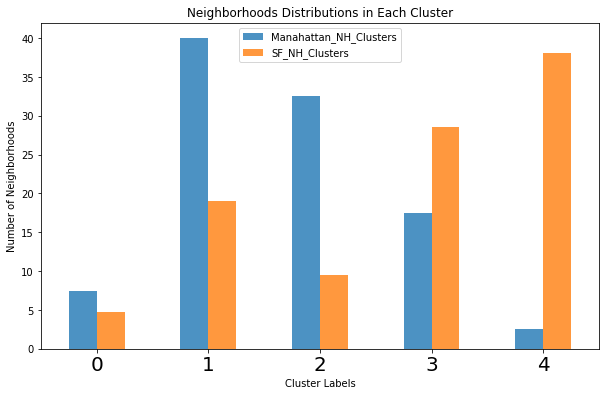

In [437]:
nh_clusters_compare.plot(kind='bar',alpha=0.8,figsize=(10, 6))

plt.xlabel('Cluster Labels') # add to x-label to the plot
plt.xticks(fontsize=20,rotation=0)
plt.ylabel('Number of Neighborhoods') # add y-label to the plot
plt.title('Neighborhoods Distributions in Each Cluster') # add title to the plot

plt.show()

## Results and Discussion <a name="results"></a>

Examine each cluster and determine the discriminating venue categories that distinguish each cluster.
* Manhattan has high Neighborhood intensity in Label 1
* SF has high Neighborhood intensity in Label 4

Let's figure out what categories are in those labels

In [493]:
Manhattan_HindensityNH=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
Manhattan_HindensityNH

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,1,Coffee Shop,Discount Store,Yoga Studio,Seafood Restaurant,Sandwich Place,Big Box Store,Steakhouse,Supplement Shop,Kids Store,Bank
2,Manhattan,1,Deli / Bodega,Park,Bakery,Tapas Restaurant,Café,Wine Shop,Pool,Latin American Restaurant,Cocktail Bar,Restaurant
5,Manhattan,1,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Sushi Restaurant,Beer Garden,Supermarket,Bike Trail,Lounge,Burger Joint,Cuban Restaurant
9,Manhattan,1,Italian Restaurant,Wine Shop,Deli / Bodega,Park,Coffee Shop,Hobby Shop,Dog Run,Monument / Landmark,Café,Sandwich Place
11,Manhattan,1,Deli / Bodega,Sandwich Place,Coffee Shop,Playground,Gym,Farmers Market,Metro Station,Bus Stop,Café,School
19,Manhattan,1,Wine Shop,Vietnamese Restaurant,Bar,Coffee Shop,Pizza Place,Bagel Shop,Dog Run,Korean Restaurant,Speakeasy,Juice Bar
21,Manhattan,1,Park,Wine Shop,Spa,American Restaurant,Salad Place,Steakhouse,Furniture / Home Store,Men's Store,Boutique,Café
25,Manhattan,1,Coffee Shop,Deli / Bodega,Bar,Yoga Studio,Ethiopian Restaurant,Spa,Bubble Tea Shop,Chinese Restaurant,Cosmetics Shop,Pizza Place
26,Manhattan,1,Park,Bookstore,American Restaurant,Coffee Shop,Tennis Court,Burger Joint,Café,Food Truck,Deli / Bodega,Seafood Restaurant
28,Manhattan,1,Park,Cupcake Shop,Coffee Shop,Sandwich Place,Food Court,Fountain,Plaza,Gym,Performing Arts Venue,Salad Place


In [449]:
SF_HindensityNH=SF_merged.loc[SF_merged['Cluster Labels'] == 4, SF_merged.columns[[1] + list(range(5, SF_merged.shape[1]))]]
SF_HindensityNH

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Western Addition/Japantown,4,Bakery,New American Restaurant,Breakfast Spot,Lounge,Salon / Barbershop,Playground,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Boutique
9,Parkside/Forest Hill,4,Bakery,Sandwich Place,Chinese Restaurant,Yoga Studio,Bookstore,Bubble Tea Shop,Pool,Pizza Place,Pharmacy,Park
12,Outer Richmond,4,Bakery,Café,Seafood Restaurant,Yoga Studio,Italian Restaurant,Scenic Lookout,Sandwich Place,Playground,Park,New American Restaurant
13,Sunset,4,Vietnamese Restaurant,Coffee Shop,Dumpling Restaurant,Sandwich Place,Sushi Restaurant,Bakery,Park,Chinese Restaurant,Ramen Restaurant,Korean Restaurant
14,Marina,4,Spa,Italian Restaurant,Yoga Studio,Wine Bar,Steakhouse,Ice Cream Shop,Pet Store,Park,Mexican Restaurant,Liquor Store
16,St. Francis Wood/Miraloma/West Portal,4,Wine Bar,Italian Restaurant,Coffee Shop,Yoga Studio,Park,Burger Joint,Sandwich Place,Café,Candy Store,Pub
17,Twin Peaks-Glen Park,4,Scenic Lookout,Trail,Bus Stop,Light Rail Station,Theater,Coffee Shop,Burrito Place,Burger Joint,Café,French Restaurant
20,Visitacion Valley/Sunnydale,4,Grocery Store,Sandwich Place,Café,Park,Trail,Asian Restaurant,Dog Run,Market,Marijuana Dispensary,Light Rail Station


#### Lets visualize thoes categories using **WordCloud**

In [453]:
# install wordcloud
! pip install  wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

    100% |████████████████████████████████| 163kB 1.7MB/s 
Wordcloud is installed and imported!


In [454]:
stopwords = set(STOPWORDS)

In [483]:
def getCategory(table):
    w=""
    for c in range(2,len(table.columns)):
        w+=" ".join(table[table.columns[c]])
    return w

In [499]:
SF_wc=getCategory(SF_HindensityNH)

In [485]:
# instantiate a word cloud object
VenuesC_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
VenuesC_wc.generate(SF_wc)

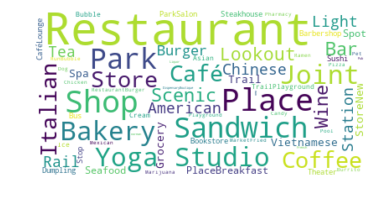

In [488]:
# display the word cloud
plt.imshow(VenuesC_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [498]:
Manhattan_wc=getCategory(Manhattan_HindensityNH)

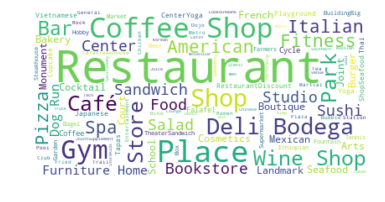

In [497]:
# instantiate a word cloud object
VenuesC_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
VenuesC_wc.generate(Manhattan_wc)
# display the word cloud
plt.imshow(VenuesC_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see that both cities' neighborhoods have lots of Restaurant. There is no huge differences between two cities. However, take a close look, we can find that Manhattan has more **Gym, Deli, Bodega**, which reflects a busy city busy life and people persue a fast_paced life. On the contrast, San Francisco has more **Yoga Studio, Sandwich Shop, and Bakery,** which shows a relatively lesuire life pace.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to explore the similarity between Mahattan and San Francisco, based on how venues are distributed in those two cities' neighborhoods. By clustering data parsed from Foursquare API, we get the venues distribution for each city and get groupds of neighborhood that represent the city life of both cities.

We discover that both cities are proper place for living and woking. There are slightly differences:
* Manhattan has a more fast_paced city life
* San Fransisco is more lesurie